In [4]:
import pandas as pd
# Load the data
data = pd.read_csv('../data/boiler_data.csv') 

# Display the data
print("Data loaded successfully! Here are the first 5 rows:")
print(data.head())

Data loaded successfully! Here are the first 5 rows:
  sensor_id  run_hours  temp_avg  pressure_avg  vibration  failure_flag
0     B_101       1500      85.2           5.1        1.2             0
1     B_102       1850      91.5           6.3        2.5             1
2     B_103        200      80.1           4.8        0.9             0
3     B_104       2200      95.8           7.1        3.0             1
4     B_105        900      83.0           5.5        1.5             0


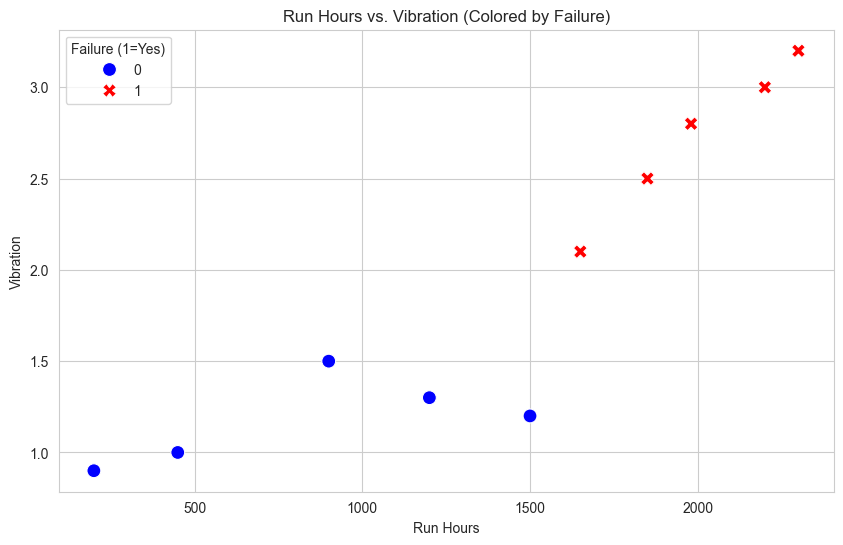

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a visual style
sns.set_style("whitegrid")

# Create a chart to compare Run Hours vs. Vibration, colored by Failure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='run_hours', y='vibration', hue='failure_flag', data=data, 
                palette={0: 'blue', 1: 'red'}, style='failure_flag', s=100)
plt.title('Run Hours vs. Vibration (Colored by Failure)')
plt.xlabel('Run Hours')
plt.ylabel('Vibration')
plt.legend(title='Failure (1=Yes)')
plt.show()

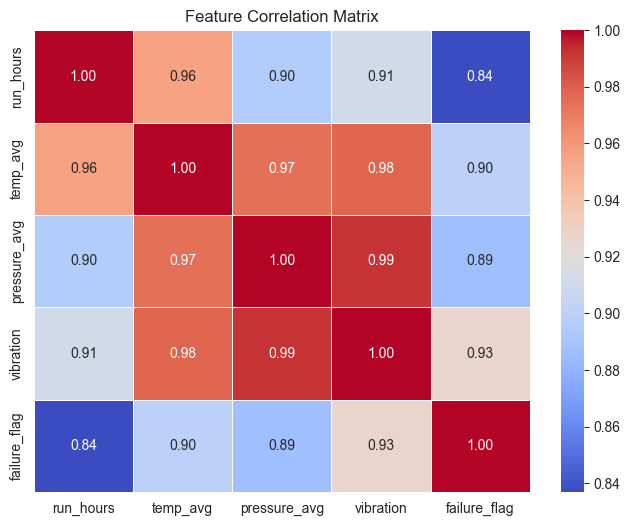


--- Correlation with Failure Flag ---
failure_flag    1.000000
vibration       0.926635
temp_avg        0.899534
pressure_avg    0.886484
run_hours       0.836821
Name: failure_flag, dtype: float64


In [6]:
# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Print the correlation of each feature with the target (failure_flag)
print("\n--- Correlation with Failure Flag ---")
print(correlation_matrix['failure_flag'].sort_values(ascending=False))

In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import numpy as np
import pandas as pd # Ensure pandas is imported

# Note: The data is already loaded, but we re-load it to be safe in a fresh session
data = pd.read_csv('../data/boiler_data.csv')

# --- 1. Define the Rule (Heuristic Baseline) ---
# True (1) if Run Hours is 1500 or more AND Vibration is greater than 2.0
rule_prediction = np.where((data['run_hours'] >= 1500) & (data['vibration'] > 2.0), 1, 0)

# --- 2. Calculate Metrics ---
actual_outcomes = data['failure_flag']
cm = confusion_matrix(actual_outcomes, rule_prediction)

# Calculate the key metrics
rule_accuracy = accuracy_score(actual_outcomes, rule_prediction)
rule_precision = precision_score(actual_outcomes, rule_prediction, zero_division=0)
rule_recall = recall_score(actual_outcomes, rule_prediction, zero_division=0)
rule_f1 = f1_score(actual_outcomes, rule_prediction, zero_division=0)

# --- 3. Output Results (Kairo's Request) ---
print("--- Heuristic Baseline Metrics (The Rule) ---")
print(f"Accuracy: {rule_accuracy:.2f}")
print(f"Precision: {rule_precision:.2f}")
print(f"Recall: {rule_recall:.2f}")
print(f"F1 Score: {rule_f1:.2f}")
print("\nConfusion Matrix:")
print(cm)

--- Heuristic Baseline Metrics (The Rule) ---
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Confusion Matrix:
[[5 0]
 [0 5]]


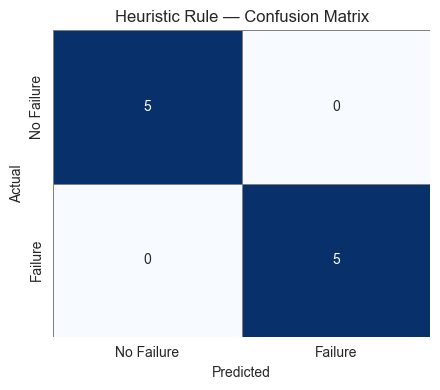

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import os 
from sklearn.metrics import confusion_matrix

# --- Re-calculating all necessary variables (THE FIX) ---
# Assuming 'data' is loaded from a previous cell run
y_true = data['failure_flag']
y_pred_rule = np.where((data['run_hours'] >= 1500) & (data['vibration'] > 2.0), 1, 0)
cm = confusion_matrix(y_true, y_pred_rule) # <-- This calculation was missing!


os.makedirs("figures", exist_ok=True) # Makes sure the 'figures' folder exists
labels = ["No Failure", "Failure"] 

plt.figure(figsize=(4.5,4)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels, 
            cbar=False, linewidths=0.5, linecolor="gray") 
plt.title("Heuristic Rule — Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.tight_layout() 
plt.savefig("figures/rule_confusion_matrix.png", dpi=200) 
plt.show()